<a href="https://colab.research.google.com/github/surya323-ma/spam_classifier/blob/main/spam_classifier_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
from google.colab import files
uploaded=files.upload()
import pandas as pd
file_name = next(iter(uploaded)) # Get the name of the uploaded file
df=pd.read_csv(file_name)
print(df.columns)

df.head(10)
df.shape

Saving mail_data .csv to mail_data .csv
Index(['Category', 'Message'], dtype='object')


(5572, 2)

In [33]:
print(df.head(10))
print(df.shape)

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
6      ham  Even my brother is not like to speak with me. ...
7      ham  As per your request 'Melle Melle (Oru Minnamin...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...
(5572, 2)


In [34]:
data = df.where((pd.notnull(df)), '')
data.loc[data['Category'] == 'spam', 'Category'] = 0
data.loc[data['Category'] == 'ham', 'Category'] = 1

In [35]:
X = data['Message']
y = data['Category']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [37]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [38]:
model = LogisticRegression()
model.fit(X_train_features, y_train)

LogisticRegression()

In [39]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [40]:
prediction_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_test_data)

In [41]:
print("Accuracy on Training Data: ", accuracy_on_training_data)
print("Accuracy on Test Data: ", accuracy_on_test_data)


Accuracy on Training Data:  0.9676912721561588
Accuracy on Test Data:  0.9668161434977578


In [43]:
labels = ['Training Data', 'Test Data']
accuracies = [accuracy_on_training_data, accuracy_on_test_data]

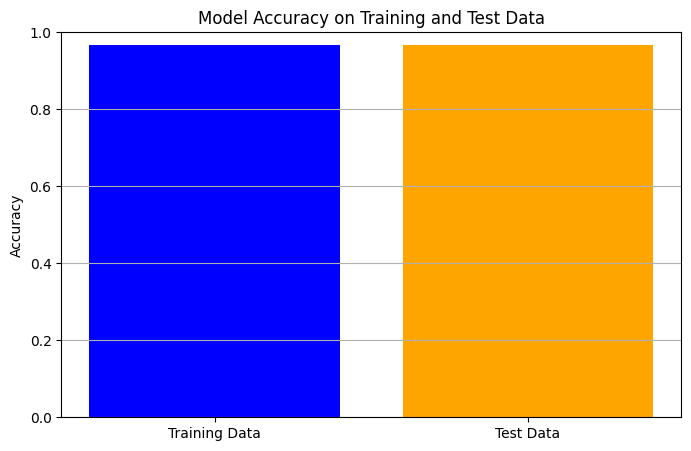

In [44]:
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Training and Test Data')
plt.grid(axis='y')
plt.show()